In [52]:
#Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
#Load the dataset:
df = pd.read_csv(r"train_final.csv")
df

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,10233,10235,10235,10235,10235,10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,10234,10236,10236,10236,10236,10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",NaN
10233,10235,10237,10237,10237,10237,10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,10236,10238,10238,10238,10238,10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",NaN


In [54]:
df = df.drop(['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'],axis=1)
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


#### Exploratory Data Analysis (EDA)

In [55]:
# Check the structure and basic statistics of the dataset
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10236 non-null  object 
 1   label                 10236 non-null  object 
 2   statement             10236 non-null  object 
 3   subject               10236 non-null  object 
 4   speaker               10236 non-null  object 
 5   speaker_job           7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10236 non-null  object 
 8   barely_true_counts    10236 non-null  float64
 9   false_counts          10236 non-null  float64
 10  half_true_counts      10236 non-null  float64
 11  mostly_true_counts    10236 non-null  float64
 12  pants_on_fire_counts  10236 non-null  float64
 13  context               10136 non-null  object 
 14  sentiment             8848 non-null   object 
 15  sentiment_score    

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000,10236.000000
mean,11.534682,13.288296,17.136088,16.436987,6.202130,-0.296043,0.428116,0.157902,0.135912,0.176635,0.202460,0.311449
std,18.975243,24.114878,35.849544,36.154678,16.130382,0.338128,0.329600,0.115305,0.108172,0.156314,0.161100,0.167438
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.200000,0.070827,0.061252,0.059984,0.076222,0.180859
50%,2.000000,2.000000,3.000000,3.000000,1.000000,-0.300000,0.400000,0.128523,0.106215,0.128076,0.158421,0.287995
75%,12.000000,12.750000,13.000000,11.000000,5.000000,0.000000,0.600000,0.215977,0.180697,0.249916,0.288627,0.418026
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.900000,7.100000,0.931034,0.931034,0.918537,0.931034,0.963480


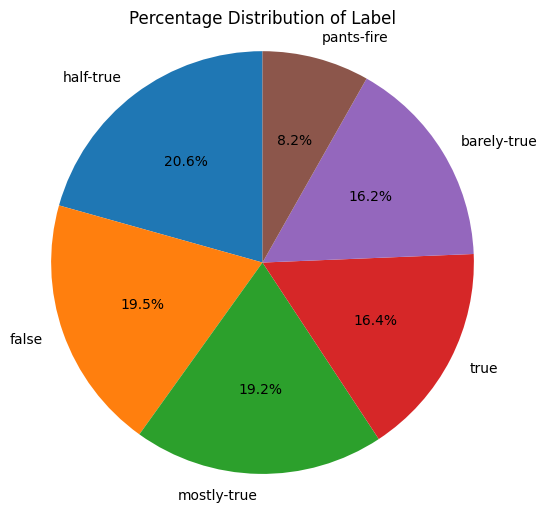

In [56]:
import matplotlib.pyplot as plt

# Calculate the value counts and percentages
value_counts = df['label'].value_counts()
percentages = value_counts / len(df) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Label')
plt.axis('equal')
plt.show()


####  Data Cleaning and Preprocessing

In [57]:
#Fill missing values, if any
df = df.fillna('')

# Perform text cleaning and preprocessing (e.g., removing special characters, converting to lowercase)
import re

def preprocess_text(text):
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    
    # Other preprocessing steps (if any)
    
    return text


df['statement'] = df['statement'].apply(preprocess_text)

# Split the dataset into train and test sets
X = df['statement']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####  Feature Extraction

In [58]:
# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#### Model Training and Evaluation

In [59]:
#Train the logistic regression model:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# Make predictions on the test set:
y_pred = model.predict(X_test_vect)

In [61]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.23876953125
Classification Report:
              precision    recall  f1-score   support

 barely-true       0.25      0.20      0.22       352
       false       0.24      0.29      0.27       391
   half-true       0.28      0.30      0.29       435
 mostly-true       0.19      0.22      0.20       370
  pants-fire       0.19      0.13      0.15       149
        true       0.25      0.22      0.23       351

    accuracy                           0.24      2048
   macro avg       0.23      0.22      0.23      2048
weighted avg       0.24      0.24      0.24      2048

Confusion Matrix:
[[ 69  87  82  60  17  37]
 [ 58 114  80  66  22  51]
 [ 59  86 131  91  16  52]
 [ 36  68  94  80  17  75]
 [ 25  42  19  28  19  16]
 [ 31  70  67  96  11  76]]


#### Bar plot of sentiment distribution:

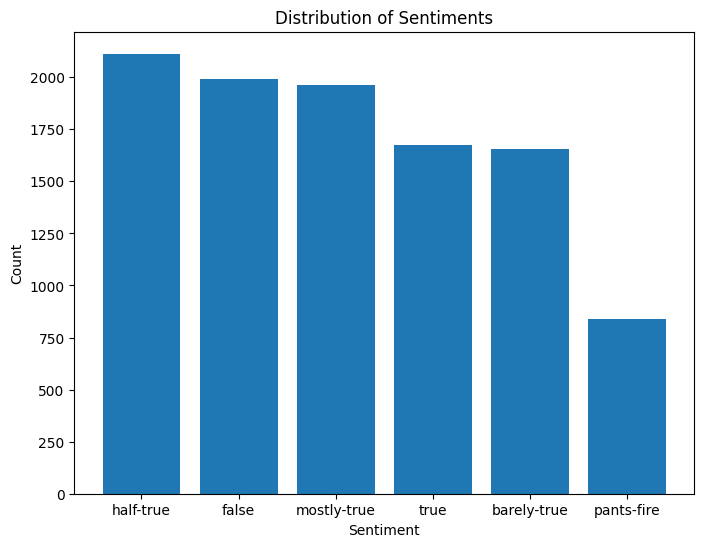

In [62]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Confusion matrix

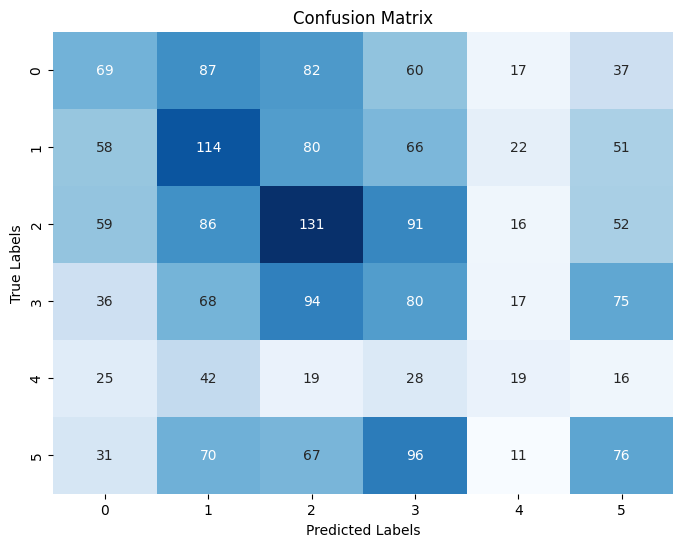

In [63]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Heatmap of sentiment correlation

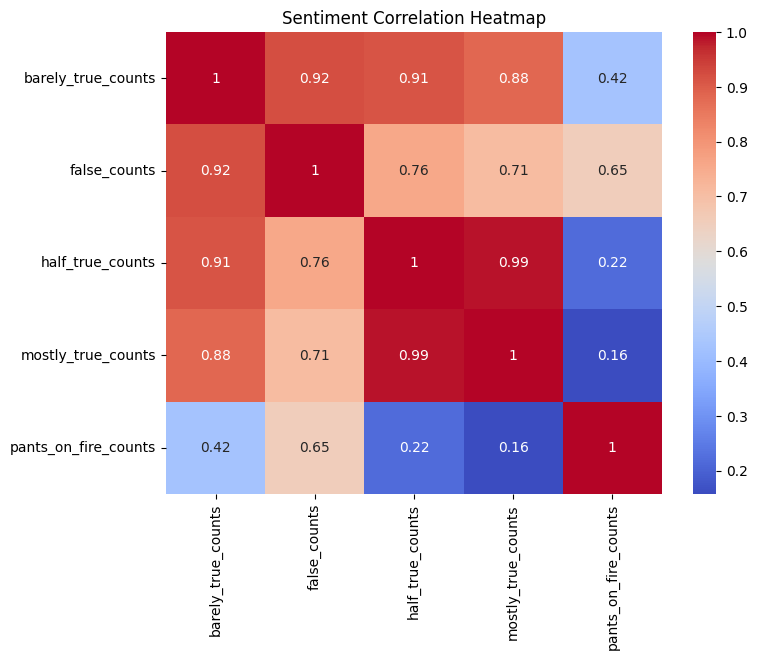

In [64]:
sentiment_corr = df[['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm')
plt.title('Sentiment Correlation Heatmap')
plt.show()


#### Stacked bar plot of sentiment distribution by sentiment code:

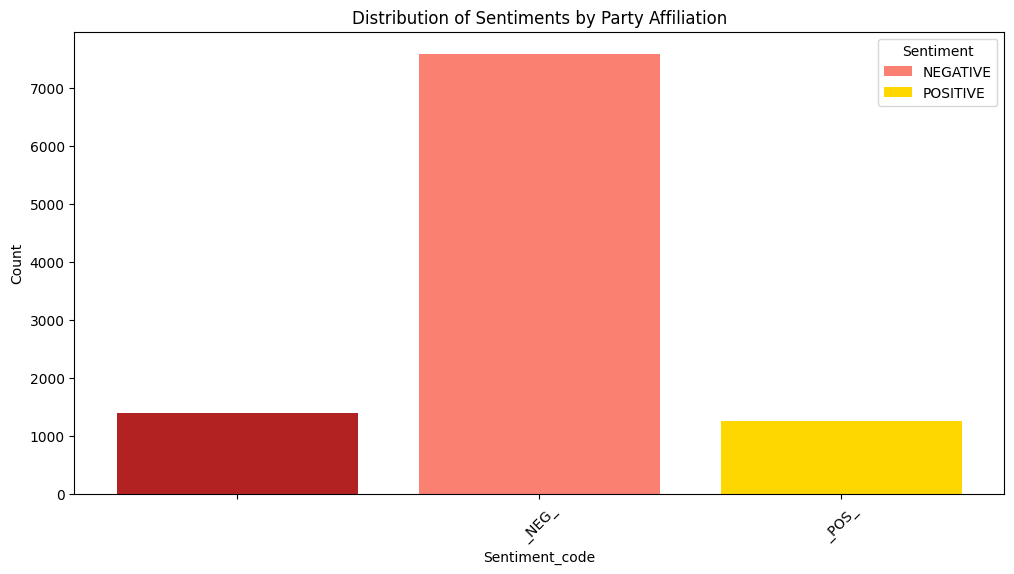

In [65]:
grouped_data = df.groupby(['sentiment_code', 'sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
colors = ['firebrick', 'salmon', 'gold', 'limegreen', 'darkgreen']
sentiments = grouped_data.columns

for i, sentiment in enumerate(sentiments):
    plt.bar(grouped_data.index, grouped_data[sentiment], label=sentiment, color=colors[i])

plt.xlabel('Sentiment_code')
plt.ylabel('Count')
plt.title('Distribution of Sentiments by Party Affiliation')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

#### Box plot of sentiment scores by sentiment:

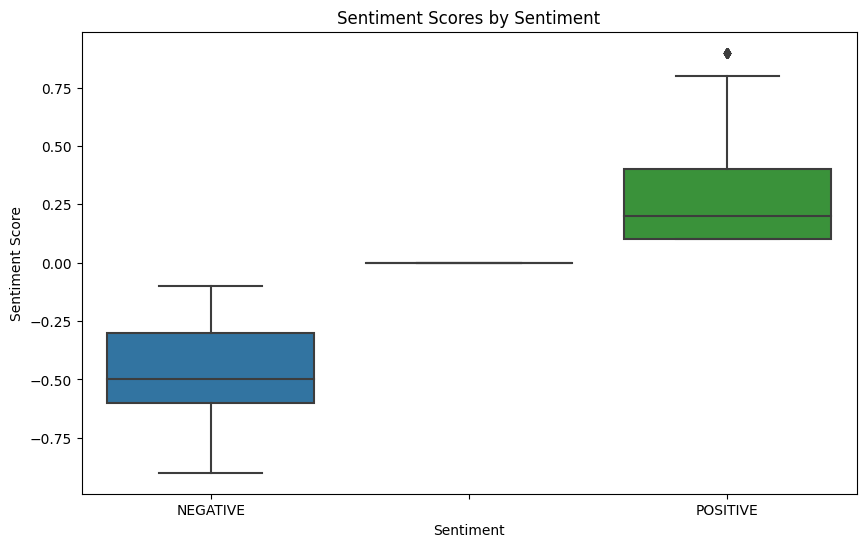

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='sentiment_score', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment')
plt.show()

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 69  87  82  60  17  37]
 [ 58 114  80  66  22  51]
 [ 59  86 131  91  16  52]
 [ 36  68  94  80  17  75]
 [ 25  42  19  28  19  16]
 [ 31  70  67  96  11  76]]


In [68]:
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

# Calculate TPR (Sensitivity, Recall)
TPR = TP / (TP + FN)

# Calculate FPR
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")


True Positive Rate (TPR): 0.6627906976744186
False Positive Rate (FPR): 0.5576923076923077


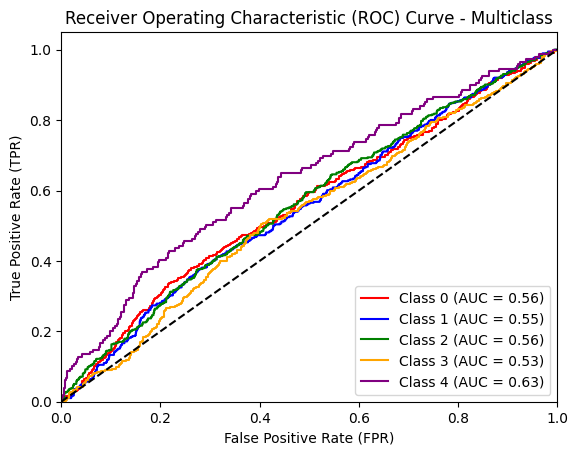

In [69]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for the multiclass problem
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate the predicted probabilities for each class
y_pred_prob = model.predict_proba(X_test_vect)

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Customize colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()
